### Fetch Data 

In [1]:
import pandas as pd
from imblearn.datasets import fetch_datasets

In [2]:
# Load data
data = fetch_datasets()['protein_homo']

# Prepare data in a pandas dataframe
data = pd.concat([
    pd.DataFrame(data.data),
    pd.Series(data.target)
], axis=1)

# Add column names
col_names = [str(i) for i in range(74)] +['target']
data.columns = col_names

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,-1
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,-1
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,-1
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,-1
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,-1


In [4]:
data.to_csv('data/protein_data.csv', index=False)

### Accuracy 

In [5]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [6]:
data = pd.read_csv('data/protein_data.csv')

# remap target class to 0 and 1
data['target'] = data['target'].map({-1:0, 1:1})

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0


In [8]:
data.shape

(145751, 75)

In [9]:
data.target.value_counts()

0    144455
1      1296
Name: target, dtype: int64

In [10]:
# Imbalanced target
data.target.value_counts() / len(data)

0    0.991108
1    0.008892
Name: target, dtype: float64

In [11]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

In [12]:
X_train.shape, X_test.shape

((102025, 74), (43726, 74))

In [13]:
# Baseline prediction: predict the majority class

y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

In [14]:
# Train the model - Random Forests
rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=2, n_jobs=4)

rf.fit(X_train, y_train)

y_train_rf = rf.predict_proba(X_train)[:,1]
y_test_rf = rf.predict_proba(X_test)[:,1]

In [15]:
# Logistic Regression
lr = LogisticRegression(random_state=0,  max_iter=1000)

lr.fit(X_train, y_train)

y_train_lr = lr.predict_proba(X_train)[:,1]
y_test_lr = lr.predict_proba(X_test)[:,1]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
# Accuracy score of all 3 models
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
print('Accuracy Logistic Regression test:', accuracy_score(y_test, lr.predict(X_test)))

Accuracy Baseline test:  0.9907377761514888
Accuracy Random Forest test: 0.9962951104605955
Accuracy Logistic Regression test: 0.9970040708045557


In [19]:
# Percentage of Minority Correctly Classified
def return_minority_perc(y_true, y_pred):
    return np.mean(np.where((y_true==1)&(y_pred==1),1,0))*100

print('% minority correctly classified, Baseline test: ', return_minority_perc(y_test, y_test_base))
print('% minority correctly classified, Random Forest test:', return_minority_perc(y_test, rf.predict(X_test)))
print('% minority correctly classified, Regression test:', return_minority_perc(y_test, lr.predict(X_test)))

% minority correctly classified, Baseline test:  0.0
% minority correctly classified, Random Forest test: 0.5580203997621552
% minority correctly classified, Regression test: 0.6655079357819146


### Precision - Recall 

In [20]:
!pip install yellowbrick

     |████████████████████████████████| 271 kB 4.9 MB/s eta 0:00:01


In [21]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
)

from yellowbrick.classifier import (
    ClassificationReport,
    DiscriminationThreshold,
)

import warnings
warnings.filterwarnings("ignore")

In [22]:
data = pd.read_csv('data/protein_data.csv')

# remap target class to 0 and 1
data['target'] = data['target'].map({-1:0, 1:1})

In [23]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

In [25]:
# Baseline prediction: predict the majority class

y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

In [26]:
# Random Forests
rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=2, n_jobs=4)

rf.fit(X_train, y_train)

y_train_rf = rf.predict_proba(X_train)[:,1]
y_test_rf = rf.predict_proba(X_test)[:,1]

In [27]:
# Logistic Regression
lr = LogisticRegression(random_state=0,  max_iter=1000)

lr.fit(X_train, y_train)

y_train_logit = lr.predict_proba(X_train)[:,1]
y_test_logit = lr.predict_proba(X_test)[:,1]

#### Precision 

In [29]:
print('Precision Baseline test: ', precision_score(y_test, y_test_base))
print('Precision Random Forest test:', precision_score(y_test, rf.predict(X_test)))
print('Precision Logistic Regression test:', precision_score(y_test, lr.predict(X_test)))

Precision Baseline test:  0.0
Precision Random Forest test: 0.9959183673469387
Precision Logistic Regression test: 0.9448051948051948


#### Recall 

In [30]:
print('Recall Baseline test: ', recall_score(y_test, y_test_base, pos_label=1))
print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test), pos_label=1))
print('Recall Logistic Regression test:', recall_score(y_test, lr.predict(X_test), pos_label=1))

Recall Baseline test:  0.0
Recall Random Forest test: 0.6024691358024692
Recall Logistic Regression test: 0.7185185185185186


#### F1-Score 

In [31]:
print('F-measure Baseline test: ', f1_score(y_test, y_test_base, pos_label=1))
print('F-measure Random Forest test:', f1_score(y_test, rf.predict(X_test), pos_label=1))
print('F-measure Logistic Regression test:', f1_score(y_test, lr.predict(X_test), pos_label=1))

F-measure Baseline test:  0.0
F-measure Random Forest test: 0.7507692307692309
F-measure Logistic Regression test: 0.8162692847124824


#### Classification Report 

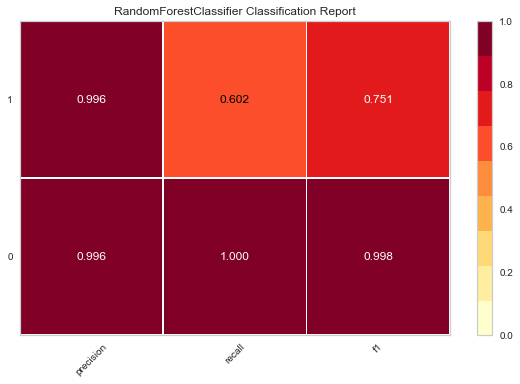

In [32]:
visualizer = ClassificationReport(rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show() 

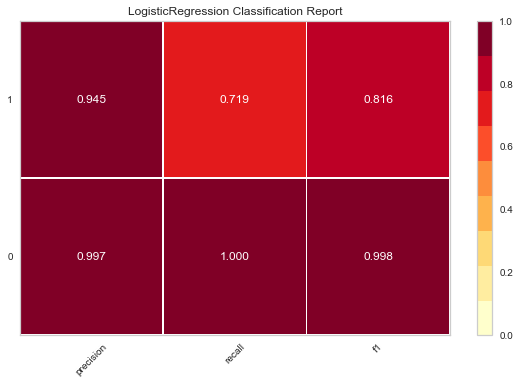

In [33]:
visualizer = ClassificationReport(lr)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

#### Precision, recall vs probability threshold 

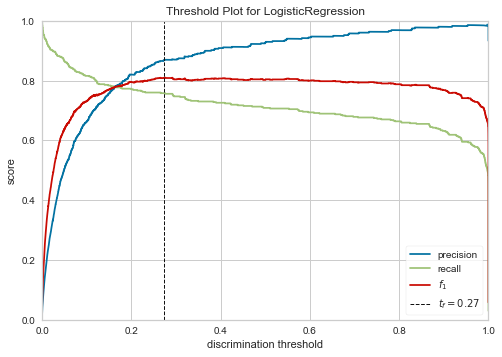

In [34]:
visualizer = DiscriminationThreshold(lr,
                                     n_trials=1,
                                     cv=0.5,
                                     argmax='fscore',
                                     random_state=0,
                                     is_fitted='auto',
                                     exclude = "queue_rate")

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()